In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Cell 2: Load the dataset
file_path = "River.csv"  
data = pd.read_csv(file_path)


In [4]:
# Cell 3: Initial exploration
print("Dataset Shape:", data.shape)
print("\nDataset Columns:", data.columns)
print("\nDataset Info:")
data.info()
print("\nFirst 5 rows of the dataset:")
data.head()


Dataset Shape: (128978, 24)

Dataset Columns: Index(['Index', 'pH', 'Iron', 'Nitrate', '5.29E-76', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128978 entries, 0 to 128977
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Index                   128978 non-null  int64  
 1   pH                      126457 non-null  float64
 2   Iron                    128126 non-null  float64
 3   Nitrate                 126728 non-null  float64
 4   5.29E-76                125148 non-null  float64
 5   Lead                    128414 non-null  float64
 6   Zinc                    125525 non-null  float64
 

,Index,pH,Iron,Nitrate,5.29E-76,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,2,5.443762,2.010586e-02,3.816994,230.995630,NaN,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
1,7,7.258203,6.110000e-09,9.261676,182.242341,4.400000e-224,0.416478,Colorless,0.047803,1.016196,...,2.325094,6.020000e-16,214.553104,River,15.891905,61.139140,April,11.0,4.0,0
2,9,7.100650,3.019038e-03,3.620641,157.043934,6.460000e-148,0.112994,Colorless,0.050613,0.842107,...,2.284971,8.840000e-07,113.909077,River,11.899376,14.010268,April,7.0,12.0,0
3,20,9.686076,2.048400e-04,9.588365,240.350234,6.900000e-23,5.448293,Faint Yellow,0.040746,0.926771,...,3.338544,6.576640e-04,270.921435,River,7.824436,32.121731,August,13.0,7.0,0
4,44,5.400853,7.340000e-14,5.739483,177.395747,1.950000e-100,1.402138,Light Yellow,0.345791,0.116614,...,2.770273,3.074910e-01,478.567391,River,29.371510,61.400910,September,10.0,15.0,0


In [5]:
# Cell 4: Filter relevant columns for analysis
columns_of_interest = ['pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine', 'Total Dissolved Solids', 'Water Temperature', 'Target']
filtered_data = data[columns_of_interest]


In [6]:
# Cell 5: Handle missing data if any
filtered_data.isnull().sum()  # Check for missing values
filtered_data = filtered_data.dropna()  # Drop rows with missing values


In [8]:
# Convert categorical columns to numeric (e.g., 'Color' column)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
filtered_data['Color'] = label_encoder.fit_transform(filtered_data['Color'])

# Check if the data is now numeric
filtered_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 114956 entries, 0 to 128977
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      114956 non-null  float64
 1   Nitrate                 114956 non-null  float64
 2   Color                   114956 non-null  int32  
 3   Turbidity               114956 non-null  float64
 4   Odor                    114956 non-null  float64
 5   Chlorine                114956 non-null  float64
 6   Total Dissolved Solids  114956 non-null  float64
 7   Water Temperature       114956 non-null  float64
 8   Target                  114956 non-null  int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 8.3 MB


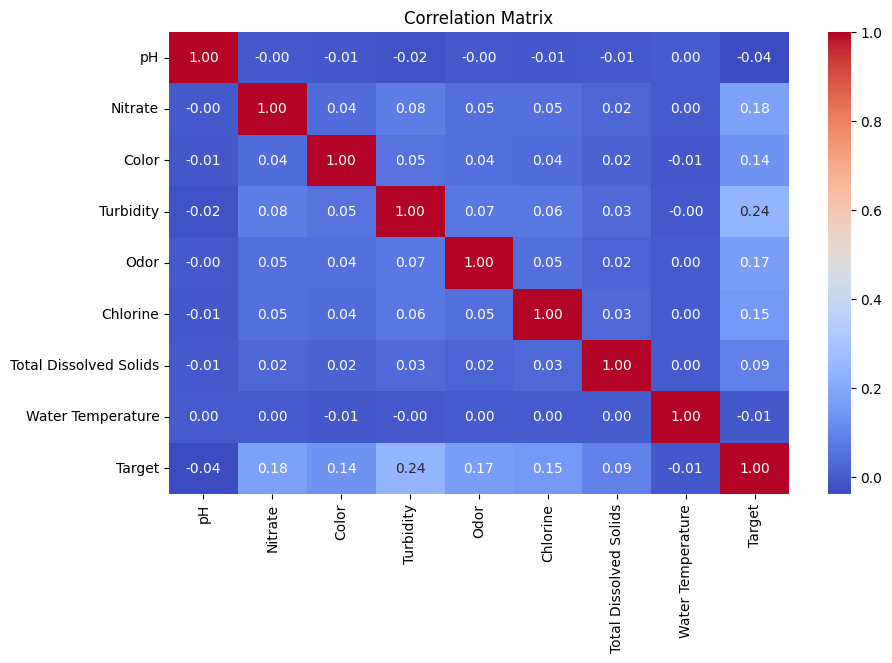

In [9]:
# Cell 6: Data visualization - Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [10]:
# Cell 8: Split the data into features and target
X = filtered_data.drop('Target', axis=1)
y = filtered_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Cell 9: Build and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Cell 10: Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8577

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.90     17742
           1       0.66      0.79      0.72      5250

    accuracy                           0.86     22992
   macro avg       0.80      0.84      0.81     22992
weighted avg       0.87      0.86      0.86     22992


Confusion Matrix:
[[15549  2193]
 [ 1079  4171]]


In [13]:
# Cell 10: Evaluate the model and print accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8577
